# Titanic Tragedy Project (Code Along)

## Business Understanding

- Date of the Tragedy
- What exactly happened.
- Numbers
    - Number of passengers
    - Survivors and Fatalities
- What contributed to this high death rate


### Problem Statement
- Mention the problem
- Show how the project is going to alleviate the problem

### Objectives
- Identify factors that led to survival
- Predict the survival using the model

## Metrcis of success
 - The project will be termed as successful if we can identify the factors that led to survival of the passengers
 - Achieve above 75% accuracy
 - Achieve a true positive rate (recall) of above 70%

## Data Understanding
- Explain the columns in depth

In [53]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [54]:
# Load and read the dataset
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
# Inspect the tail as well
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### Observation

The dataset seems to be normal from top to bottom

### Dataset relevance
The datset 


In [56]:
data.shape

(891, 12)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [58]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Observations

In [59]:
# Check Statictical Summary for categorical columns
data.describe(include = "object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [60]:
# Check for unique values
for coln in data:
    uni_value = data[coln].unique()
    print(f"{coln}\n, {uni_value}\n")

PassengerId
, [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 

## Data Preparation

### Data Cleaning

In [61]:
data1 =data.copy(deep = True)
# drop cabin
data1.drop("Cabin", axis = 1, inplace = True)
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [62]:
# Convert the column names into lowercase
data1.columns = data1.columns.str.lower()
data1.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

In [63]:
# Convert pclass to a str
data1["pclass"] = data1["pclass"].apply(str)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    object 
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [64]:
# Check for null values
data1.isna().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
embarked         2
dtype: int64

In [65]:
# Impute the age variable with median
age_median = data1["age"].median()
data1["age"] = data1["age"].fillna(age_median)

# Filling null values for embarked column
embarked_mode = data1["embarked"].mode()[0]
data1["embarked"] = data1["embarked"].fillna(embarked_mode)

In [66]:
data1.isna().sum().any()

False

No more null values in our dataset

In [67]:
# Check for duplicates
data1.duplicated().sum()

0

No duplicates in our dataset

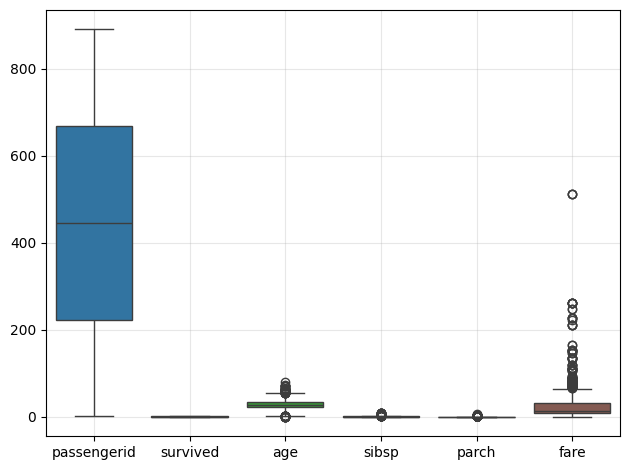

In [68]:
# Checking for outliers
sns.boxplot(data1)
plt.tight_layout()
plt.grid(alpha = .3);

#### Observation
we seem to have outliers in the fare column but they are genuine. They will not be removed

In [69]:
# Save the clean dataset
data1.to_csv("Clean_df.csv")

## Exploratory Data Analysis

### Univariate Analysis

In [71]:
# Getting the numerical columns
num_coln = data1.select_dtypes("number")
num_coln

,passengerid,survived,age,sibsp,parch,fare
0,1,0,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,0,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000
887,888,1,19.0,0,0,30.0000
888,889,0,28.0,1,2,23.4500
889,890,1,26.0,0,0,30.0000


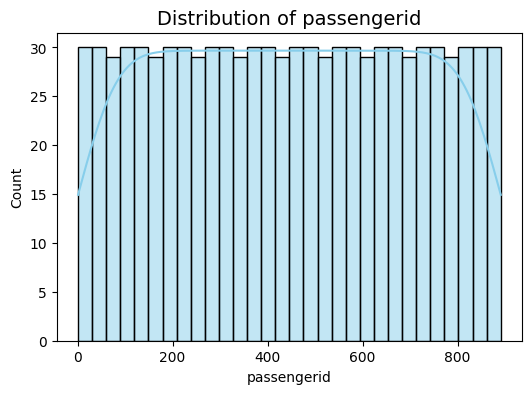

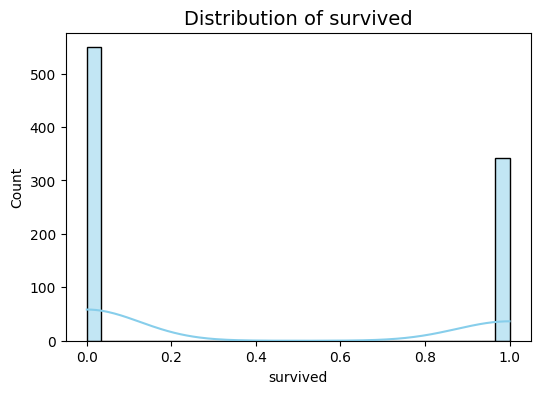

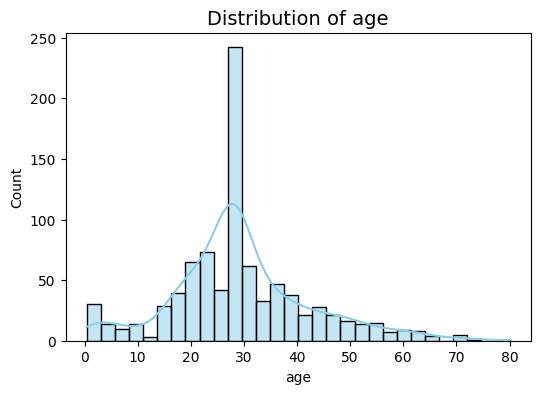

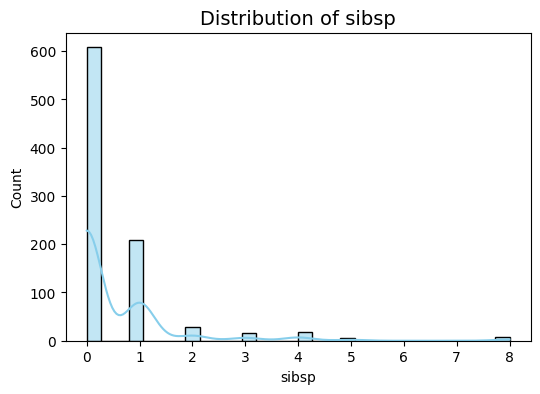

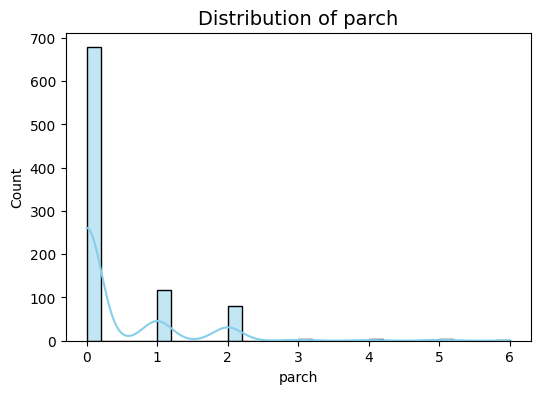

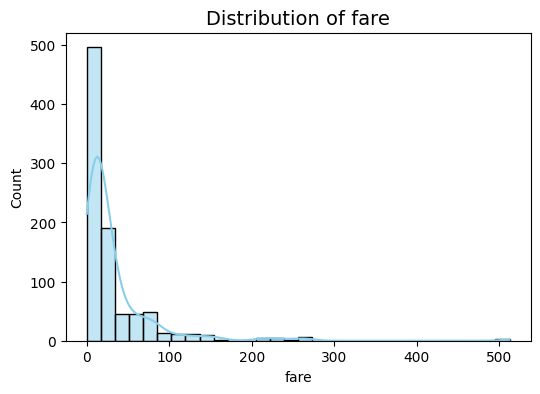

In [76]:
# Visualize all numerical columns in a histogram
for col in num_coln:
    plt.figure(figsize=(6,4))
    sns.histplot(num_coln[col], kde=True, bins=30, color="skyblue")
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

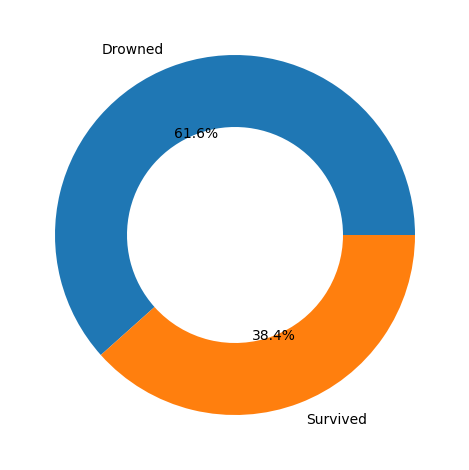

In [84]:
# Check categorical
survivors = data1['survived'].value_counts(ascending = False)

label = ["Drowned", "Survived"]

# Plot Pie plot
plt.pie(survivors, labels = label, wedgeprops = dict(width = .4), autopct = "%.1f%%")
plt.tight_layout();

#### Observation
We had more deaths than survivors
Class imbalance is also present in the dataset


**Do other univariate analysis**

In [87]:
### Feature Engineering
data1['age'] = pd.qcut(data1['age'], q=10, duplicates='drop')
data1['fare'] = pd.qcut(data1['fare'], q=10, duplicates='drop')
data1

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,"(20.0, 24.0]",1,0,A/5 21171,"(-0.001, 7.55]",S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,"(32.5, 38.0]",1,0,PC 17599,"(39.688, 77.958]",C
2,3,1,3,"Heikkinen, Miss. Laina",female,"(24.0, 28.0]",0,0,STON/O2. 3101282,"(7.854, 8.05]",S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,"(32.5, 38.0]",1,0,113803,"(39.688, 77.958]",S
4,5,0,3,"Allen, Mr. William Henry",male,"(32.5, 38.0]",0,0,373450,"(7.854, 8.05]",S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,"(24.0, 28.0]",0,0,211536,"(10.5, 14.454]",S
887,888,1,1,"Graham, Miss. Margaret Edith",female,"(16.0, 20.0]",0,0,112053,"(27.0, 39.688]",S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,"(24.0, 28.0]",1,2,W./C. 6607,"(21.679, 27.0]",S
889,890,1,1,"Behr, Mr. Karl Howell",male,"(24.0, 28.0]",0,0,111369,"(27.0, 39.688]",C
